In [1]:
from skimage.io import imread

text1 = imread("uk_text.jpg")

In [2]:
import matplotlib.pyplot as plt

def plot(image, fs = (5,5), dpi = 128):
    fig, ax=plt.subplots(figsize=fs, dpi=dpi)
    ax.set_title("Figsize: {}, dpi: {}".format(fs,dpi))
    plt.imshow(image)
    ax.legend()

In [3]:
from skimage.transform import rotate
from skimage import img_as_ubyte

tmp = rotate(text1[0:400,0:400],angle=90) 
text1_colored = img_as_ubyte(tmp)

def changeColor(image, eps=255):
    for i, rows in enumerate(image):
        for j, color in enumerate(rows):
            r = int(color[0])
            g = int(color[1])
            b = int(color[2])
            if r+g+b < eps:
                image[i,j,:] = [255,g,b]
                
                
            
changeColor(text1_colored,eps=255*3 - 10)

/home/konstantin/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [4]:
text2 = imread("random_image.jpg")

def changeColor2(image, eps=255):
    for i, rows in enumerate(image):
        for j, color in enumerate(rows):
            r = int(color[0])
            g = int(color[1])
            b = int(color[2])
            if r+g+b < eps:
                image[i,j,:] = [r,g,255]
                
text2_colored = text2[400:800,100:500,:]            
changeColor2(text2_colored, eps=255*3 - 10)

No handles with labels found to put in legend.


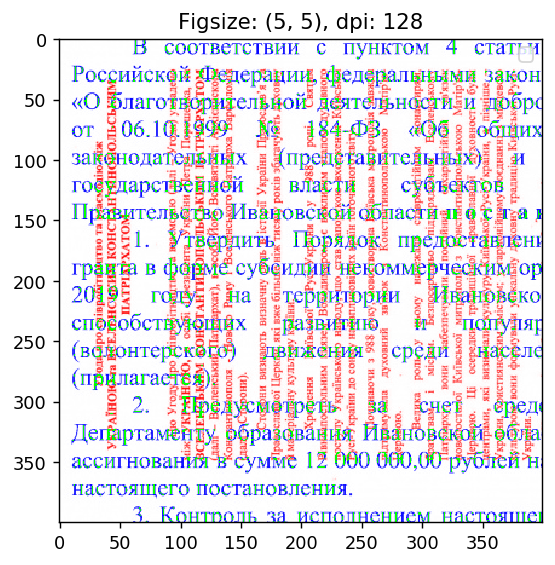

In [6]:
def combine(image1, image2, eps=10):
    image = image1.copy()
    
    for i, rows in enumerate(image1):
        for j, color in enumerate(rows):
            r1,g1,b1 = int(color[0]), int(color[1]), int(color[2])
            r2,g2,b2 = int(image2[i,j,0]), int(image2[i,j,1]), int(image2[i,j,2])
            if r1+g1+b1 + r2+g2+b2 < 255*4 + eps: # if none is white
                image[i,j,:] = [
                    0, 
                    255,
                    0
                ]
            elif r1+g1+b1 > r2+g2+b2: # if the first is white
                image[i,j,:] = [r2,g2,b2]
            else:
                image[i,j,:] = [r1,g1,b1] # if the second is white
    return image

result = combine(text1_colored,text2_colored)
plot(result)

In [7]:
from skimage.io import imsave

imsave("./res.jpg",result)